# An Analysis of Immigration Perceptions Among European Sub-Regions*


|Name|SNR|
|----|-------|
|*Mattia Malerba*|*2008050*|
|*Lorenzo Mattesini*|*2014924*|

***_Final Assignment for the course Applied Economic Analysis 1 (2017-2018)_**

## Abstract

In this notebook we create a series of indexes measuring the attitudes of two samples of individuals from Western Europe and Southern Europe towards the impact of immigrant in five different aspects: skills, economy, jobs, budget, culture, policy. Then test to see if there is a statistically significant difference in the perception of immigrants by Western and Southern Europeans using a two-tailed Wilcoxon rank-sum test. Through this analysis we find that for two out of six index variables there is such a statistically significant difference, specifically for the impact of immigration on native workers’ job prospects and social security, while acknowledging that potential bias could arise from the fact that our sample may not be fully representative of these European subregions.

## Research question


> *Do Southern and Western European people hold different perceptions on immigration and how does it relate to the economy and society?*

## Motivation

Across the European continent many populist parties have managed to gain traction and make a substantial impact on their political landscape. One of the common themes that can be found throughout all of these parties is a political hostility towards incoming immigrant, justified by the position that these immigrants have a negative net effect on the country they come to. This has been noted by many experts, such as [Yann Algan](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3074443) who states “ We find that the recent crisis has resulted in more negative attitudes towards immigrants”. While this theme is prevalent in Europe, there are a variety of potential cultural differences that could greatly affect the popularity and potential differences in anti-immigrant rhetoric. This analysis was conducted to see if the differences in populist parties between Southern and Western European nations could be partially explained by different perceptions on the impact of immigrants between different cultures.

## Method

The first step in verifying differences in attitudes towards immigration is to create a series of indexes that capture the main ways people think immigrants affect their country. To do this we used 6 variables, each pertaining to a specific question asked to subjects with 5 potential answers varying between “Strongly Disagree”(1) and “Strongly Agree”(5). These variables, along with all the other relevant variables in our study, are summarized in the table below.

|Index Variables|Description|
|----|------|
|Skills|*“Immigration introduces useful new skill sets to the labour force”*|
|Economy|*“Immigration improves the economy as a whole”*|                           
|Jobs|*“Immigration harms the job prospects of native workers”*|                      
|Budget|*“Immigration places a strain on social security and pension budget”*|       
|Culture|*“Immigration contributes to a more vibrant culture”*|                   	     
|Policy|*“Immigration is handled adequately by policy makers”*|

|Treatment Variables|Description|
|----|--------|
|Southern|Equals 1 for observations from Southern Europe and 0 otherwise| 

|Nuisance Variables|Description|
|----|------|
|Gender|Categorical binary variable (Male/Female)|
|Age|Age of the respondent (years)|
|Nationality|Nationality of the respondent (variable dropped)|


The data was collected by a [survey](https://drive.google.com/file/d/1geOMNM4FgH5xrJ0y2GBaGFVGI5gr8ZFn/view?usp=sharing) which was conducted previously in the year as a project for the course "Methods: Experiments and Surveys". The surveys were distributed online using the Tilburg University network and the personal network of the experimenters. 
Afterwards, it was sliced into two subsamples, Western and Southern, depending on the self-identified country of origin of the subject. Assignment into each group from the country of origin provided was done using this legend:

> Western Europen Countries: United Kingdom, Ireland, France, Germany, The Netherlands, Belgium, Switzerland, Austria. 

> Southern Europen Countries: Greece, Italy, Spain.

Once the data was imported and sampled, we summarized the data creating some relevant descriptive statistics. We calculated the average index values for each variable for each subsample and created a bar graph (Figure 1) for more convenient visualization. Each index value average was then tested for statistical significance with its equivalent from the other sub-sample using a two-tailed Wilcoxon rank-sum test.


## Execution

### Importing packages and libraries

In [59]:
import pandas as pd
import scipy 
from scipy import stats
import plotly
import plotly.plotly as py
from plotly.graph_objs import *
from IPython.display import Image

### Import data

In [60]:
#Premilinary data cleaning has been done separately on Excel, after downloading the data from Qualtrics. Specifically, a new variable 'Southern' has been defined and equals 0 for Western Countries and 1 for Southern Countries. Therefore, the variable 'Nationality' has been subsequently dropped.

df = pd.read_csv('Dataset.csv', sep=";", header=0, index_col=0)
df.head(10)                #the first 10 elements of the dataset are shown below

,Gender,Age,Southern,Skills,Economy,Jobs,Budget,Culture,Policy
N°,,,,,,,,,
1,Male,25,1,2,2,3,2,3,2
2,Male,23,1,4,4,3,3,4,3
3,Female,23,0,4,4,1,3,5,2
4,Male,22,0,1,3,4,4,1,3
5,Female,23,0,4,4,2,5,4,1
6,Female,24,1,2,2,1,3,2,2
7,Female,23,1,5,4,1,2,3,2
8,Male,25,0,4,4,2,2,4,1
9,Male,25,1,3,4,2,2,3,1


### Descriptive Statistics

As we look at demographics between samples, we observe that they are relatively balanced across age and gender. Only Southern Europe presents a larger number of males compared to females. 




In [61]:
#Division of the sample into Southern Countries and Western Countries. Relevant descriptive statistics for the variable Age and Gender are summarized into four different tables.

south = df[df.Southern == 1]
south1 = south[south.columns.difference(['Southern', 'Budget', 'Culture', 'Economy', 'Jobs', 'Policy', 'Skills'])]
south1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,36.0,23.944444,2.123938,16.0,23.0,25.0,25.0,28.0


*Table 1: Descriptive statistics of the variable Age for Southern Countries*

In [62]:
west = df[df.Southern == 0]
west1 = west[west.columns.difference(['Southern', 'Budget', 'Culture', 'Economy', 'Jobs', 'Policy', 'Skills'])]
west1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,36.0,24.694444,6.131043,19.0,22.75,24.0,25.0,58.0


*Table 2: Descriptive statistics of the variable Age for Western Countries*

In [63]:
south.select_dtypes(include=['O'])
list(south.select_dtypes(include=['O']).columns)
[south[c].value_counts() for c in list(south.select_dtypes(include=['O']).columns)]

[Male      24
 Female    12
 Name: Gender, dtype: int64]

*Table 3: Frequency table for Southern Countries by Gender*

In [64]:
west.select_dtypes(include=['O'])
list(west.select_dtypes(include=['O']).columns)
[west[c].value_counts() for c in list(west.select_dtypes(include=['O']).columns)]

[Female    18
 Male      18
 Name: Gender, dtype: int64]

*Table 4: Frequency table for Western Countries by Gender*

The tables below show some descriptive statistics of our index variables, for Southern Europe and Western Europe respectively. Furthermore, differences between means are summarized in a bar graph.

In [65]:
south2 = south[south.columns.difference(['Age', 'Southern'])]
south2.describe().T

,count,mean,std,min,25%,50%,75%,max
Budget,36.0,2.666667,1.264911,1.0,2.0,2.5,3.25,5.0
Culture,36.0,3.833333,0.971008,2.0,3.0,4.0,4.25,5.0
Economy,36.0,3.722222,0.778684,2.0,3.0,4.0,4.00,5.0
Jobs,36.0,2.166667,1.108409,1.0,1.0,2.0,3.00,5.0
Policy,36.0,2.416667,1.052209,1.0,2.0,2.0,3.00,5.0
Skills,36.0,3.527778,1.081959,1.0,3.0,4.0,4.00,5.0


*Table 5: Descriptive statistics of Index Variables for Southern Europe*

In [66]:
west2 = west[west.columns.difference(['Age', 'Southern'])]
west2.describe().T

,count,mean,std,min,25%,50%,75%,max
Budget,36.0,3.222222,1.072010,1.0,2.00,3.5,4.0,5.0
Culture,36.0,3.305556,1.327069,1.0,2.00,4.0,4.0,5.0
Economy,36.0,3.555556,1.106976,1.0,3.00,4.0,4.0,5.0
Jobs,36.0,2.694444,1.009086,1.0,2.00,2.0,4.0,5.0
Policy,36.0,2.638889,1.073120,1.0,2.00,2.0,4.0,5.0
Skills,36.0,3.500000,1.133893,1.0,2.75,4.0,4.0,5.0


*Table 6: Descriptive statistics of Index Variables for Western Europe*

In [67]:
# Preparing the data to plot the bar graph by creating two arrays containing the means of the index variables by European subregion
import csv

sskills=0
wskills=0
seconomy=0
weconomy=0
sjobs=0
wjobs=0
sbudget=0
wbudget=0
sculture=0
wculture=0
spolicy=0
wpolicy=0

with open('Dataset.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=';')
    totalRows = 0
    firstline = True

    for row in readCSV:
        if firstline:
            firstline = False
            continue

        totalRows += 1

        if int(row[3]) == 1:
            sskills += int(row[4])
            seconomy += int(row[5])
            sjobs += int(row[6])
            sbudget += int(row[7])
            sculture += int(row[8])
            spolicy += int(row[9])
        else:
            wskills += int(row[4])
            weconomy += int(row[5])
            wjobs += int(row[6])
            wbudget += int(row[7])
            wculture += int(row[8])
            wpolicy += int(row[9])

# Definition of a function to calculate the means
def mean(param1, param2):
    return float(param1) / float(param2)

divisor = float(totalRows/2)

mean_sskills = mean(sskills, divisor)
mean_wskills = mean(wskills, divisor)
mean_seconomy = mean(seconomy, divisor)
mean_weconomy = mean(weconomy, divisor)
mean_sjobs = mean(sjobs, divisor)
mean_wjobs = mean(wjobs, divisor)
mean_sbudget = mean(sbudget, divisor)
mean_wbudget = mean(wbudget, divisor)
mean_sculture = mean(sculture, divisor)
mean_wculture = mean(wculture, divisor)
mean_spolicy = mean(spolicy, divisor)
mean_wpolicy = mean(wpolicy, divisor)

# Definition of the arrays
southern_means = [mean_sskills, mean_seconomy, mean_sjobs, mean_sbudget, mean_sculture, mean_spolicy]
western_means = [mean_wskills, mean_weconomy, mean_wjobs, mean_wbudget, mean_wculture, mean_wpolicy]
means_labels = ['Skills', 'Economy', 'Jobs', 'Budget', 'Culture', 'Policy']

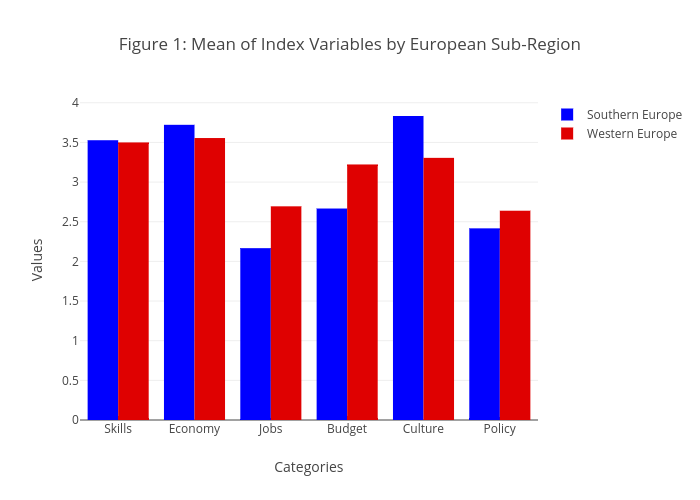

In [68]:
# Plotting the bar graph

trace_south = Bar(x=means_labels,
                  y=southern_means,
                  name='Southern Europe',
                  marker=dict(color='#0000FF'))
trace_west = Bar(x=means_labels,
                 y=western_means,
                 name='Western Europe',
                 marker=dict(color='#DF0101'))
data = [trace_south, trace_west]
layout = Layout(title="Figure 1: Mean of Index Variables by European Sub-Region",
                xaxis=dict(title='Categories'),
                yaxis=dict(title='Values'))
fig = Figure(data=data, layout=layout)

py.iplot(fig, filename='histogram1', sharing='public')
py.image.save_as(fig, filename='histogram.png')
Image('histogram.png')

### Statistical analysis

In [69]:
#Definition of the subsamples needed to run statistical tests

#Budget
west_budget = west[west.columns.difference(['Age', 'Southern', 'Economy', 'Jobs', 'Policy', 'Skills','Culture','Gender'])]
south_budget = south[south.columns.difference(['Age', 'Southern', 'Economy', 'Jobs', 'Policy', 'Skills','Culture','Gender'])]
#Culture
west_culture = west[west.columns.difference(['Age', 'Southern', 'Economy', 'Jobs', 'Policy', 'Skills','Budget','Gender'])]
south_culture = south[south.columns.difference(['Age', 'Southern', 'Economy', 'Jobs', 'Policy', 'Skills','Budget','Gender'])]
#Economy
west_economy = west[west.columns.difference(['Age', 'Southern', 'Budget', 'Jobs', 'Policy', 'Skills','Culture','Gender'])]
south_economy = south[south.columns.difference(['Age', 'Southern', 'Budget', 'Jobs', 'Policy', 'Skills','Culture','Gender'])]
#Jobs
west_jobs = west[west.columns.difference(['Age', 'Southern', 'Economy', 'Budget', 'Policy', 'Skills','Culture','Gender'])]
south_jobs = south[south.columns.difference(['Age', 'Southern', 'Economy', 'Budget', 'Policy', 'Skills','Culture','Gender'])]
#Policy
west_policy = west[west.columns.difference(['Age', 'Southern', 'Economy', 'Jobs', 'Budget', 'Skills','Culture','Gender'])]
south_policy = south[south.columns.difference(['Age', 'Southern', 'Economy', 'Jobs', 'Budget', 'Skills','Culture','Gender'])]
#Skills
west_skills = west[west.columns.difference(['Age', 'Southern', 'Economy', 'Jobs', 'Policy', 'Budget','Culture','Gender'])]
south_skills = south[south.columns.difference(['Age', 'Southern', 'Economy', 'Jobs', 'Policy', 'Budget','Culture','Gender'])]

In order to evaluate our research question, we need to find out if subjects display different perceptions on immigration between the two samples. Thus, our null and alternative hypotheses can be generally stated as follows:

> Null Hypothesis: Perceptions of the effects of immigration on the economy and society in Western Europe are the same as those in Southern Europe.

> Alternative Hypothesis: Perceptions of the effects of immigration on the economy and society in Western Europe are different to those in Southern Europe.

To test for these hypotheses, we need to compare every mean of our variables of interest between Southern and Western Europe. Since our variables are ordinal and our samples are independent from each other, we perform, for each variable, a two-tailed Wilcoxon rank-sum test. We pre-emptively choose a 10% significance level for our tests. The outputs are reported below.


#### 1. Budget

In [70]:
# Wilcoxon rank-sum tests
scipy.stats.ranksums(west_budget, south_budget)

RanksumsResult(statistic=1.9427449628985221, pvalue=0.05204698069306693)

#### 2. Culture

In [71]:
scipy.stats.ranksums(west_culture, south_culture)

RanksumsResult(statistic=-1.5035156669388563, pvalue=0.1327061199722343)

#### 3. Economy

In [72]:
scipy.stats.ranksums(west_economy, south_economy)

RanksumsResult(statistic=-0.32660639955975157, pvalue=0.74396560262698386)

#### 4. Jobs

In [73]:
scipy.stats.ranksums(west_jobs, south_jobs)

RanksumsResult(statistic=2.0722612937584235, pvalue=0.03824108000678763)

#### 5. Policy

In [74]:
scipy.stats.ranksums(west_policy, south_policy)

RanksumsResult(statistic=0.85030286781935316, pvalue=0.3951567225679119)

#### 6. Skills

In [75]:
scipy.stats.ranksums(west_skills, south_skills)

RanksumsResult(statistic=0.0056311448199957165, pvalue=0.99550702023373527)

## Results

We fail to reject the null that Southern and Western Europeans have the same views on the effects of immigration on the economy (p-value=0.7439), labour force skills (*p-value=0.9955*) and culture (*p-value=0.1327*), and also whether or not it is being adequately handled by policy makers (*p-value=0.3951*). In other words, we find no evidence of differences in perceptions between these two European sub-regions for these topics.

However, in the case of immigration’s impact on job prospects of native workers *(__p-value=0.0382__)* and social security/pension budgets *(__p-value=0.0520__)* we find statistically significant evidence that Western and Southern Europeans hold different views on these effects, as we reject the null hypotheses of equivalent perceptions.

## Discussion and Conclusion

Based on the previously discussed results, we now have a broader view on the cultural differences between Southern and Western Europe regarding attitudes towards the impacts of immigration. From this broad view we can make some conclusions regarding the potential differences in the characteristics of populist parties that would arise in these sub-regions. We could expect populist parties in Western European nations to have a somewhat more aggressive stance against immigrant that in Southern Europe in general, especially regarding the budgetary and labour market impact of immigration. Upon reflection, this should make some sense given the current differences between the two sub-regions: Western Europe has typically been characterized by a comparatively healthier labour market, driven more by high-tech exports. An analysis on native sentiment on immigrants in European countries by [Robert Rowthorn](http://www.civitas.org.uk/content/files/largescaleimmigration.pdf) states: “Immigration of workers may contribute to the decline in the relative wages and employment of increasing numbers of low-skilled workers". Similarly, Western European governments tend to have much stronger budget balances, the result of strict financial austerity. Therefore it should be somewhat understandable that people from these countries may fear an immigrant influx which could jeopardize their job opportunities and the size of their government’s spending. And this fear is exactly what would shape the anti-immigrant rhetoric of their national populist parties. 

While our analysis holds under econometric scrutiny we urge caution in assuming the external, applicable validity of these findings, as our sample contains predominantly university educated students and their personal networks, and as such may not be a representative sample of the people in these European sub-regions. Additionally, the conclusions drawn about the general attitudes of people on immigrants are supported by a very limited pool of statistical literature, and thus should be taken with a grain of salt.
